In [25]:
import pygrib
import numpy as np
from numpy import fft
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [26]:
#gfs on 1degree lat/lon grid from NOMADS server in grib2 format
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/
#use get_gfs.csh
date = '20200922' # YYYYMMDD
modelRun = '00' # HH
#specify forecast hour of file
forecastHour = '000' # HHH
#local path
path='/uufs/chpc.utah.edu/common/home/u0035056/atmos6010/data/'+date+modelRun
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour+'.grib2'

#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Visibility vis 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Wind speed (gust) gust 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInPa 40 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
iso

isobaricInhPa 200 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 200 Ozone mixing ratio o3mr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Relative humidity r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Geometric vertical velocity wz 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 250 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobari

isobaricInhPa 850 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Geometric vertical velocity wz 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Ice water mixing ratio icmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 850 Ozone mixing ratio o3mr 2020-09-22 00:00:00 2020-09-22

heightAboveGround 40 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 50 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 50 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 80 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 80 Specific humidity q 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 80 Pressure pres 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 80 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 80 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 100 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 100 100 metre U wind component 100u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveGround 100 100 metre V wind component 100v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
heightAboveSea 1829 Temperature t 2020-09-22 00:00:00 2020-09-22 00:

In [27]:
# get 500 hPa geopotential height
h = grbs.select(shortName='gh',level=500)
# Extract all the values
h5_all = h[0].values
#what are the dimensions? note lat first, lon second
print(np.shape(h5_all))
# Get the lat/lon grids from the grib2 file
lats_all, lons_all = h[0].latlons()
grbs.close()


(181, 360)


In [28]:
#changing for southern hemisphere
#make the data more manageable in this case for a SH polar stereographic projection
#upper left corner lat/lon
ult = -20
uln = 0
#lower right corner lat/lon
rlt = -90
rln = 360
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays
h5 = h5_all[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]


In [29]:
#setup projection
#plot as polar stereographic
mapcrs = ccrs.SouthPolarStereo(central_longitude=-90)

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

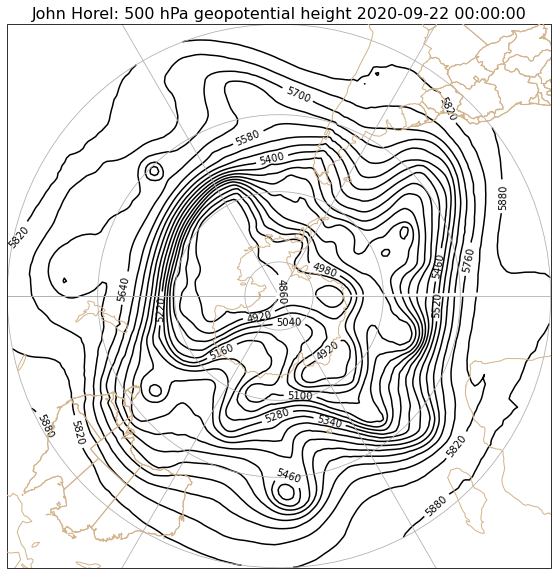

In [30]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': mapcrs})
# Plot height field
# select center contour interval, interval, and number of contours
cnt5 = 5580
int5 = 60
no5 = 12
lh5 = cnt5 - no5 * int5
up5 = cnt5 + no5 * int5
cs=ax.contour(lons,lats,h5,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
#cs1 = ax.contourf(lons,lats,h5,levels=range(lh5,up5,int5),cmap=rcol,transform=ccrs.PlateCarree())
#cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)


ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
ax.set_title('John Horel: 500 hPa geopotential height %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_500_sh_height_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()

In [31]:
# do for all latitudes
h_low = np.empty_like(h5)
#cutoff is one more than wavenumbers to be retained
cutoff = 6
print(ulti,rlti)
for lt in range(0,70):
    hl = h5[lt,:]
    #append 0 lon to have periodic
    hl = np.append(hl,hl[0])
    Fk = fft.fft(hl) # Fourier coefficients
    #zero out higher wavenumbers
    Fk[cutoff:-(cutoff-1)] = 0
    hl_low = fft.ifft(Fk).real
    h_low[lt,:] = hl_low[0:360]

110 180


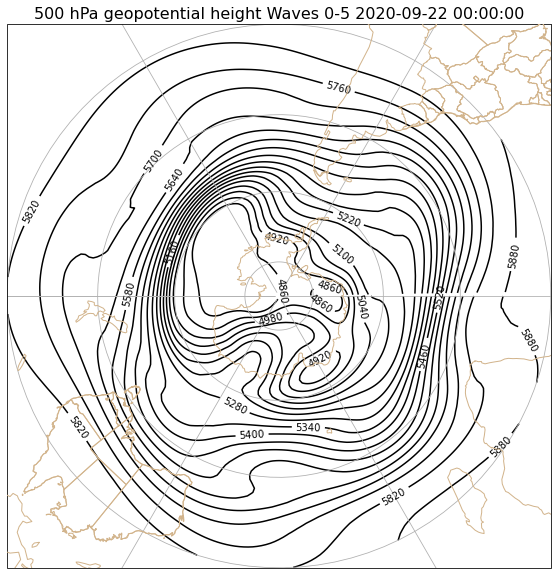

In [32]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': mapcrs})
# Plot low pass height field
cs=ax.contour(lons,lats,h_low,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
plt.clabel(cs,fmt='%0.f',inline=True)


ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
ax.set_title('500 hPa geopotential height Waves 0-5 %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_500_sh_height_waves05_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()

In [33]:
#synoptic scales
h_syn = np.empty_like(h5)
#cutoff is one more than wavenumbers to be retained
cutoff = 11
for lt in range(0,70):
    #get the mean (wavenumber 0)
    hm = np.mean(h5[lt,:])
    #get all waves other than the planetary scales
    hh = h5[lt,:] - h_low[lt,:]
    #append 0 lon to have periodic
    hh = np.append(hh,hh[0])
    #recompute now for synoptic and finer scales
    Fk_h = fft.fft(hh) # Fourier coefficients
    #zero out higher wavenumbers above what would be wavenumber 10 
    Fk_h[cutoff:-(cutoff-1)] = 0
    hi_syn = fft.ifft(Fk_h).real
    #to help it look like a weather map, add the mean back in
    hi_syn = hm + hi_syn
    h_syn[lt,:] = hi_syn[0:360]
    

In [34]:
#pull out 60S and not include wave 0
hli = 60-20
#verify 50 S
print(lats[hli,0])
#compute mean
hm50 = np.mean(h5[hli,:])
print(hm50)
h50_low = h_low[hli,:] - hm50
h50_syn = h_syn[hli,:]-hm50

-60.0
5076.7603


In [ ]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': mapcrs})
# Plot synoptic height field
cs=ax.contour(lons,lats,h_syn,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
plt.clabel(cs,fmt='%0.f',inline=True)

ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
ax.set_title('500 hPa geopotential height Waves 0,6-10 %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_500_sh_height_waves0610_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,12))
ax1.plot(h5[hli,:])
ax2.plot(h50_low)
ax3.plot(h50_syn)
ax2.set_title('')
ax3.set_title('')
ax1.set_title('John Horel: 50S Height Wavenumber Filtering %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_500_sh_height_50S_filt' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()